<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [25]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

## Importing the Dataset
Firstly lets see our dataset


In [27]:
data = pd.read_csv('mushroom_cleaned.csv')
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


# 1. About the Data


Brief Description Of My Data:
-  This dataset provides detailed information about various characteristics of mushrooms, including their cap diameter, cap shape, gill attachment, stem height, and color.
-  Each entry in the dataset is labeled with whether the mushroom is edible or not, making it valuable for classification tasks aimed at determining the safety of consuming different types of mushrooms. .
-  All 9 featureas are numerical. So we do not have to do encoding for this dataset. Our target variable is "class". If class is 1 it is edible, if it is 0 it is not edible. 
-  Features of this columns can be listed an be explained as :
  
* Cap Diameter: The diameter of the mushroom's cap.
* Cap Shape: The overall shape of the mushroom's cap.
* Gill Attachment: How the gills are attached to the stem.
* Gill Color: The color of the gills underneath the cap.
* Stem Height: The vertical length of the mushroom's stem.
* Stem Width: The diameter of the mushroom's stem.
* Stem Color: The color of the mushroom's stem.
* Season: The time of the year when the mushroom is typically found.
* Target Class - Is it edible or not?: Whether the mushroom is safe for consumption or not..

In [28]:
# Lets check the data types of the features and if we have null values.
data.info()
print(data.columns.tolist())
# As we can see all the data types int or float. And we dont have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB
['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season', 'class']


In [29]:
# Lets check the average values of features. This will tell us if we need the scaling.
for column in data.columns:
    column_average = data[column].mean()
    print(f"Average of {column}: {column_average}")
# Yes we do need to scale this dataset features.    

Average of cap-diameter: 567.2572036642916
Average of cap-shape: 4.000314610900342
Average of gill-attachment: 2.142056074766355
Average of gill-color: 7.32950865179976
Average of stem-height: 0.7591098098505489
Average of stem-width: 1051.0812991579533
Average of stem-color: 8.418062366984362
Average of season: 0.9521629527084753
Average of class: 0.5491810863329324


# 2. Objectives


# Main Objective:

The primary objective of analyzing this mushroom dataset is to develop a robust classification model that accurately distinguishes between edible and poisonous mushrooms based on their observable characteristics. By thoroughly exploring the dataset and understanding the relationships between various features, the aim is to identify key patterns or trends that can inform the development of an effective classification algorithm. Through rigorous analysis and modeling, the ultimate goal is to create a predictive tool that can help individuals, mushroom enthusiasts, and professionals confidently discern the safety of different mushroom specimens, thereby mitigating the risk of consuming toxic varieties.


#  Brief summary of data exploration and actions taken for data cleaning and feature engineering:


* Feature Engineering:
*  As you can see, all the variables are float64 or int64 type. So there is no need for encoding for this dataset.
*  However the data need to be scaled because feature's range differs from one to another. For that reason, I applied standart scaler. 
*  Also, this dataset does have 'NULL' rows in  its columns. If have use mean  imputation method.
*  From the histogram that is 4 cells below of this cell, we can understand this dataset doesnt have unbalance data problem.

In [32]:
X = data.drop(columns=['class'], axis=1)  # Dropping 'class' column  because that is our target variable.
Y = data['class']

In [33]:
# Applying standart scaling to my data:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
scaler = StandardScaler()


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

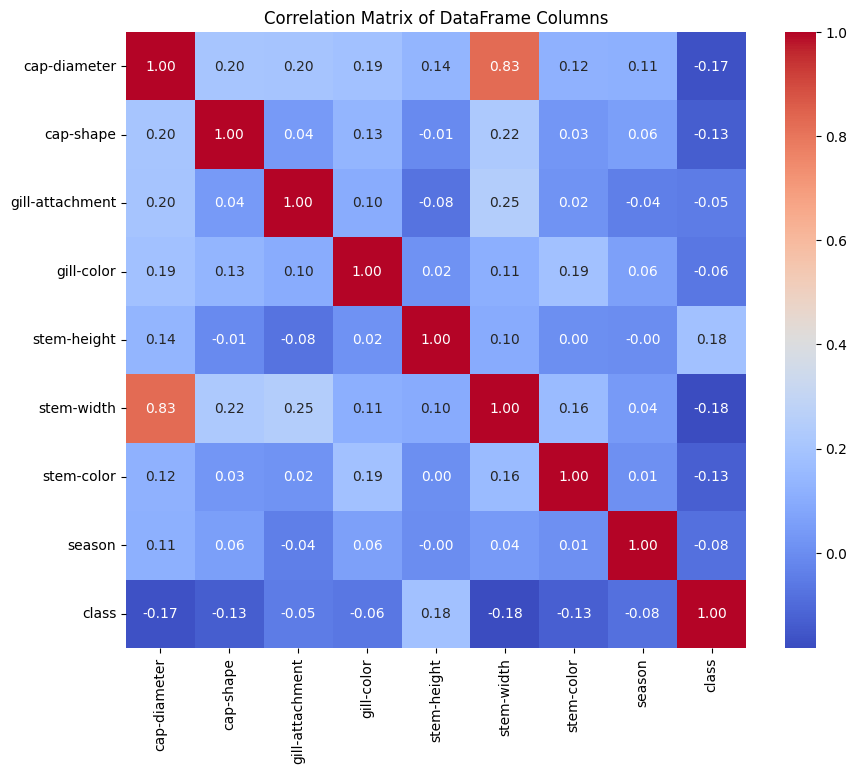

In [34]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".02f")  
plt.title('Correlation Matrix of DataFrame Columns') 
plt.show()

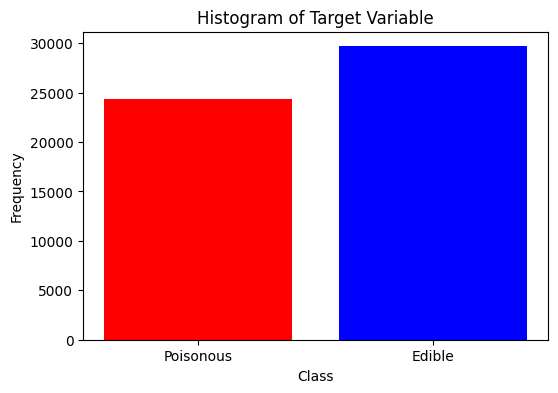

In [41]:
class_counts = data['class'].value_counts()

# Plot a histogram of the target variable
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.xticks(class_counts.index, ['Edible', 'Poisonous'])
plt.show()

# 3. Classification Models


In [35]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train are your training features and labels
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predict on test data
y_pred = logistic_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics as lists
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

metrics_list = [accuracy, precision, recall, f1_score]
print(metrics_list)

[0.6318127139816785, 0.6277815608421351, 0.623622047407268, 0.623729192876094]


In [36]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train are your training features and labels
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predict on test data
y_pred = tree_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics as lists
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

metrics_list = [accuracy, precision, recall, f1_score]
print(metrics_list)


[0.9783473674470251, 0.97843110847247, 0.9778912283588438, 0.9781523624848042]


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are your training features and labels
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics as lists
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

metrics_list = [accuracy, precision, recall, f1_score]
print(metrics_list)

[0.9908392708429722, 0.9909066953550884, 0.9906167287010847, 0.9907591961261648]


In [38]:
from sklearn.svm import SVC

# Assuming X_train, y_train are your training features and labels
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics as lists
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

metrics_list = [accuracy, precision, recall, f1_score]
print(metrics_list)

[0.9077449801054872, 0.9069604759505248, 0.9069743630445763, 0.9069674115479152]


In [39]:
import xgboost as xgb

# Assuming X_train, y_train are your training features and labels
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics as lists
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

metrics_list = [accuracy, precision, recall, f1_score]
print(metrics_list)



[0.9900990099009901, 0.99015974119597, 0.9898702157496342, 0.9900124644999964]


# Summary of 5 Classification Models

 I have created 5 different models and ı calculated 4 known metrics
 * According to the results highest accuarcy given by : Random Forest
 * According to the results highest precision given by : Random Forest
 * According to the results highest recall given by : Random Forest
 * According to the results highest f1_score given by : Random Forest
 

 As we can see Random forest model gives the best scores. But it should be noted that xgb has also very high scores on this dataset.\
 We can say that Logistic regression model underfit this dataset.\
 SVC model has 90 percent accuracy on this dataset but since tree based models have very high scores there is no need to consider SVC.  
 

# 4. Insights and key findings


This title can be divided into 2 sub titles. So ı will divide it and explain them.

# Model Performence:
 * The best model for this dataset is Random Forest Classifier model.Therefore ı would reccomend the random forest classifer model. This is because , this model has the highest scores over the 4 metrics(accuracy,precision,recall,f1 scores).
 * But we cant say the diffenece was huge with the xgb and decision tree classifier models. They have very close scores. 
 * Highest scores comes from tree based models. Other models such as logistic regression and svc doesnt perform well comparing to tree based models.
 * Logistic regression couldnt capture the complexity of this problem therefore it underfits.


# Feature Importance:
 * As you can see from correlation matrix almost all the attributes has negative correlation with target variable.
 * All the features has little importance to the target variable. Becuase highest correlation score is 0,18. 


We can see from the histogram, value count of target variable is close to each other. That means we dont have the unbalance data problem.


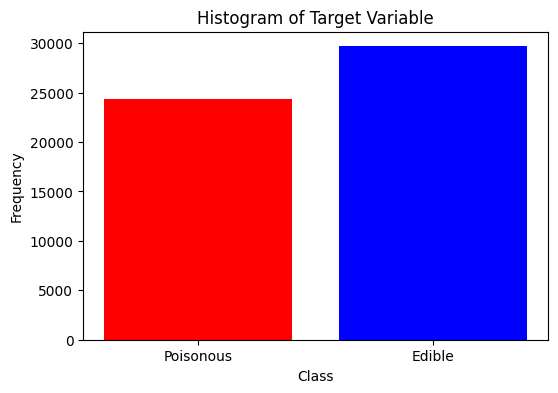

In [42]:
class_counts = data['class'].value_counts()

# Plot a histogram of the target variable
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.xticks(class_counts.index, ['Edible', 'Poisonous'])
plt.show()

# 5. Next Steps


#Moving forward, several avenues for further analysis and improvements can be explored:
  * Ensemble Techniques: Using ensemble methods could potentially improve predictive accuracy by leveraging the strengths of multiple models.


  * Hyperparameter Tuning: Fine-tuning the hyperparameters of selected models, particularly for the not tree based modesl , can optimize models performance.


  * Exploring Additional Data Sources: Integrating additional datasets, such as environmental conditions  may provide supplementary information to enhance predictive capabilities.

* This is the end of my assignment. Thank you for evaluating my work.
* My Best Regards

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
